<a href="https://colab.research.google.com/github/petersonrs/repo/blob/master/Livro_ANALISE_PRATICA_SERIES_TEMPORAIS_Cap14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#1º Passo
!pip uninstall matplotlib
!pip install matplotlib

Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1-py3.10-nspkg.pth
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/matplotlib/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.10/dist-packages/pylab.py
Proceed (Y/n)? y
y
  Successfully uninstalled matplotlib-3.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 68.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

In [18]:
#Período
inicio = '2018-01-01'
fim = '2023-12-30'

#Seleção dos ativos da carteira
ativos = ['PETR4.SA']

#Pesos
#pesos = np.array([0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10])

In [19]:
#montar carteira

carteira = yf.download(tickers=ativos, start=inicio, end=fim)

[*********************100%***********************]  1 of 1 completed


In [15]:
import matplotlib as plt

In [28]:
carteira

,Open,High,Low,Close,Adj Close,Volume,media
Date,,,,,,,
2018-01-02,16.190001,16.549999,16.190001,16.549999,6.493861,33461800,0.646720
2018-01-03,16.490000,16.719999,16.370001,16.700001,6.552718,55940900,0.652582
2018-01-04,16.780001,16.959999,16.620001,16.730000,6.564488,37064900,0.653754
2018-01-05,16.700001,16.860001,16.570000,16.830000,6.603727,26958200,0.657662
2018-01-08,16.740000,17.030001,16.709999,17.030001,6.682202,28400000,0.665477
...,...,...,...,...,...,...,...
2023-05-02,23.700001,23.740000,22.639999,22.740000,22.740000,67911100,0.888605
2023-05-03,22.600000,22.990000,22.420000,22.660000,22.660000,51133700,0.885479
2023-05-04,22.889999,23.379999,22.610001,23.020000,23.020000,57854400,0.899547


<Axes: xlabel='Date'>

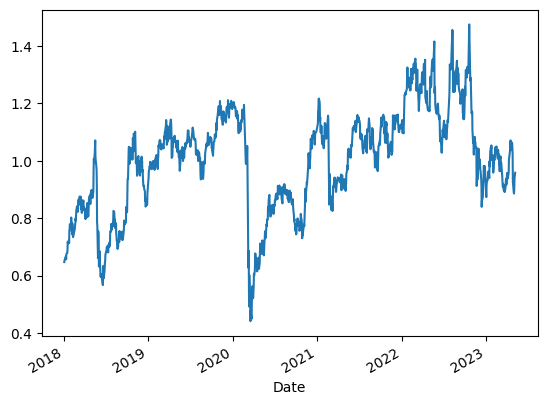

In [27]:
#seg a sexta em anos diferentes
close = carteira.Close.values
media_close = np.mean(close)

carteira['media'] = (close / media_close)
carteira.media.plot()

In [31]:
#cálculo do retorno diário
carteira['retorno_diario'] = carteira.Close - carteira.Open	

TypeError: ignored

In [34]:
df2022 = carteira['2022']


<ipython-input-34-8706d9207b02>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df2022 = carteira['2022']


<Axes: xlabel='Date'>

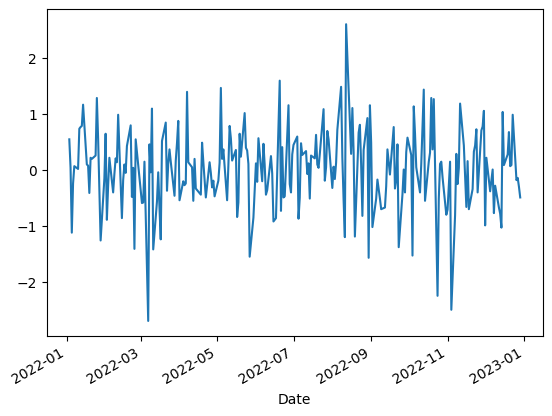

In [37]:
df2022.retorno_diario.plot()

In [ ]:
#volatilidade diaria 
carteira['volatilidade'] = carteira.High - carteira.Low